In [1]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 10 µs


In [2]:
shift_hours = range(-12, 13)
opt_shift_hour = 0

In [3]:
# val 

import pandas as pd
import os

dir_name_val = f"stddev/stddev_val_{opt_shift_hour}"
os.makedirs(dir_name_val, exist_ok=True)

results = []  # 結果を格納するためのリスト

for shift_hour in shift_hours:
    file_path = f'opt_{opt_shift_hour}_VDP_val/VDP_{shift_hour}.csv'

    data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])

    # 各列の振幅と標準偏差を計算
    amplitudes = data_df.max() - data_df.min()
    std_dev_per_column = data_df.std()

    # 結果をリストに追加
    results.append({
        'shift_hour': shift_hour,
        'Amplitude_Column1': amplitudes['Column1'],
        'Amplitude_Column2': amplitudes['Column2'],
        'Amplitude_Column3': amplitudes['Column3'],
        'StdDev_Column1': std_dev_per_column['Column1'],
        'StdDev_Column2': std_dev_per_column['Column2'],
        'StdDev_Column3': std_dev_per_column['Column3']
    })

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 結果をCSVファイルとして保存
results_df.to_csv(f"{dir_name_val}/stddev_val.csv", index=False)
# gen

import pandas as pd
import os

dir_name_gen = f"stddev/stddev_gen_{opt_shift_hour}"
os.makedirs(dir_name_gen, exist_ok=True)

results = []  # 結果を格納するためのリスト

for shift_hour in shift_hours:
    file_path = f'opt_{opt_shift_hour}_VDP_gen/VDP_{shift_hour}.csv'
    
    data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])

    # 各列の振幅と標準偏差を計算
    amplitudes = data_df.max() - data_df.min()
    std_dev_per_column = data_df.std()

    # 結果をリストに追加
    results.append({
        'shift_hour': shift_hour,
        'Amplitude_Column1': amplitudes['Column1'],
        'Amplitude_Column2': amplitudes['Column2'],
        'Amplitude_Column3': amplitudes['Column3'],
        'StdDev_Column1': std_dev_per_column['Column1'],
        'StdDev_Column2': std_dev_per_column['Column2'],
        'StdDev_Column3': std_dev_per_column['Column3']
    })

# 結果をデータフレームに変換
results_df = pd.DataFrame(results)

# 結果をCSVファイルとして保存
results_df.to_csv(f"{dir_name_gen}/stddev_gen.csv", index=False)

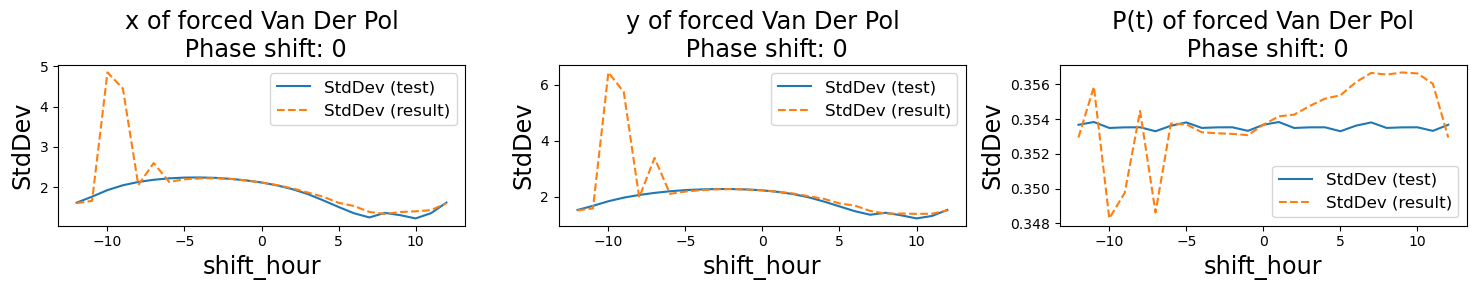

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dir_name_plot = f"stddev/stddev_plot"
os.makedirs(dir_name_plot, exist_ok=True)

# CSVファイルのパス
file_path1 = f"{dir_name_val}/stddev_val.csv"  # ここを適切なファイルパスに変更
file_path2 = f"{dir_name_gen}/stddev_gen.csv"  # ここを適切なファイルパスに変更

# データの読み込み
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 全体の図のサイズを設定
plt.figure(figsize=(15, 3))

# x of forced Van Der PolのAmplitudeとStdDevのグラフ



plt.subplot(1, 3, 1)
plt.plot(df1['shift_hour'], df1['StdDev_Column1'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column1'], label='StdDev (result)', linestyle='--')
plt.title(f'x of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')

plt.subplot(1, 3, 2)
plt.plot(df1['shift_hour'], df1['StdDev_Column2'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column2'], label='StdDev (result)', linestyle='--')
plt.title(f'y of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')


plt.subplot(1, 3, 3)
plt.plot(df1['shift_hour'], df1['StdDev_Column3'], label='StdDev (test)')
plt.plot(df2['shift_hour'], df2['StdDev_Column3'], label='StdDev (result)', linestyle='--')
plt.title(f'P(t) of forced Van Der Pol\n Phase shift: {opt_shift_hour}', fontsize = 'xx-large')
plt.xlabel('shift_hour', fontsize = 'xx-large')
plt.ylabel('StdDev', fontsize = 'xx-large')
plt.legend(fontsize = 'large')

plt.tight_layout()

# PDFファイルとして保存
plt.savefig(f"{dir_name_plot}/stddev_graph_{opt_shift_hour}.pdf")

plt.show()


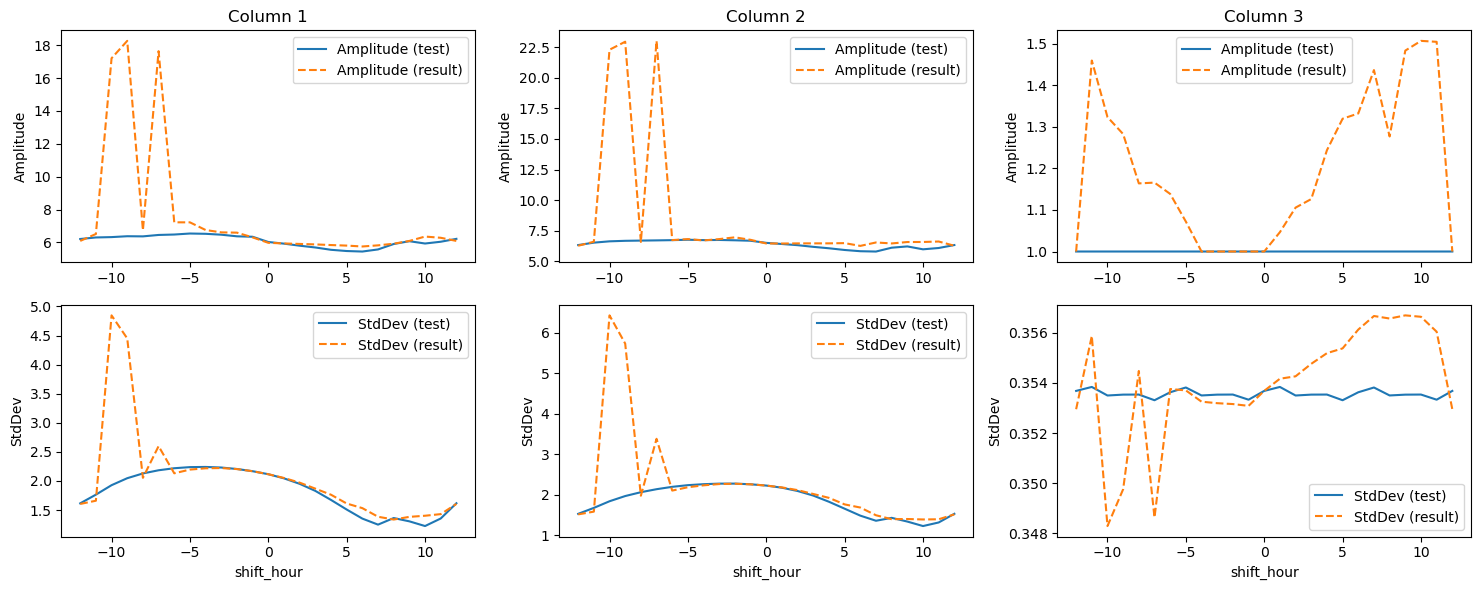

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


dir_name_plot = f"stddev/stddev_plot"
os.makedirs(dir_name_plot, exist_ok=True)


# CSVファイルのパス
file_path1 = f"{dir_name_val}/stddev_val.csv"  # ここを適切なファイルパスに変更
file_path2 = f"{dir_name_gen}/stddev_gen.csv"  # ここを適切なファイルパスに変更

# データの読み込み
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# 各列のAmplitudeとStdDevのグラフを並べて描画（横に3つ）
plt.figure(figsize=(15, 6))  # 全体の図のサイズを設定

for i in range(1, 4):
    # Amplitudeのグラフ
    plt.subplot(2, 3, i)
    plt.plot(df1['shift_hour'], df1[f'Amplitude_Column{i}'], label='Amplitude (test)')
    plt.plot(df2['shift_hour'], df2[f'Amplitude_Column{i}'], label='Amplitude (result)', linestyle='--')
    plt.title(f'Column {i}')
    plt.ylabel(f'Amplitude')
    plt.legend()

    # StdDevのグラフ
    plt.subplot(2, 3, i + 3)
    plt.plot(df1['shift_hour'], df1[f'StdDev_Column{i}'], label='StdDev (test)')
    plt.plot(df2['shift_hour'], df2[f'StdDev_Column{i}'], label='StdDev (result)', linestyle='--')
    plt.xlabel('shift_hour')
    plt.ylabel(f'StdDev')
    plt.legend()

plt.tight_layout()


plt.savefig(f"{dir_name_plot}/output_graph_{opt_shift_hour}.pdf")


plt.show()


Plot saved as 'stddev/stddev_plot/std_dev_comparison.pdf'.


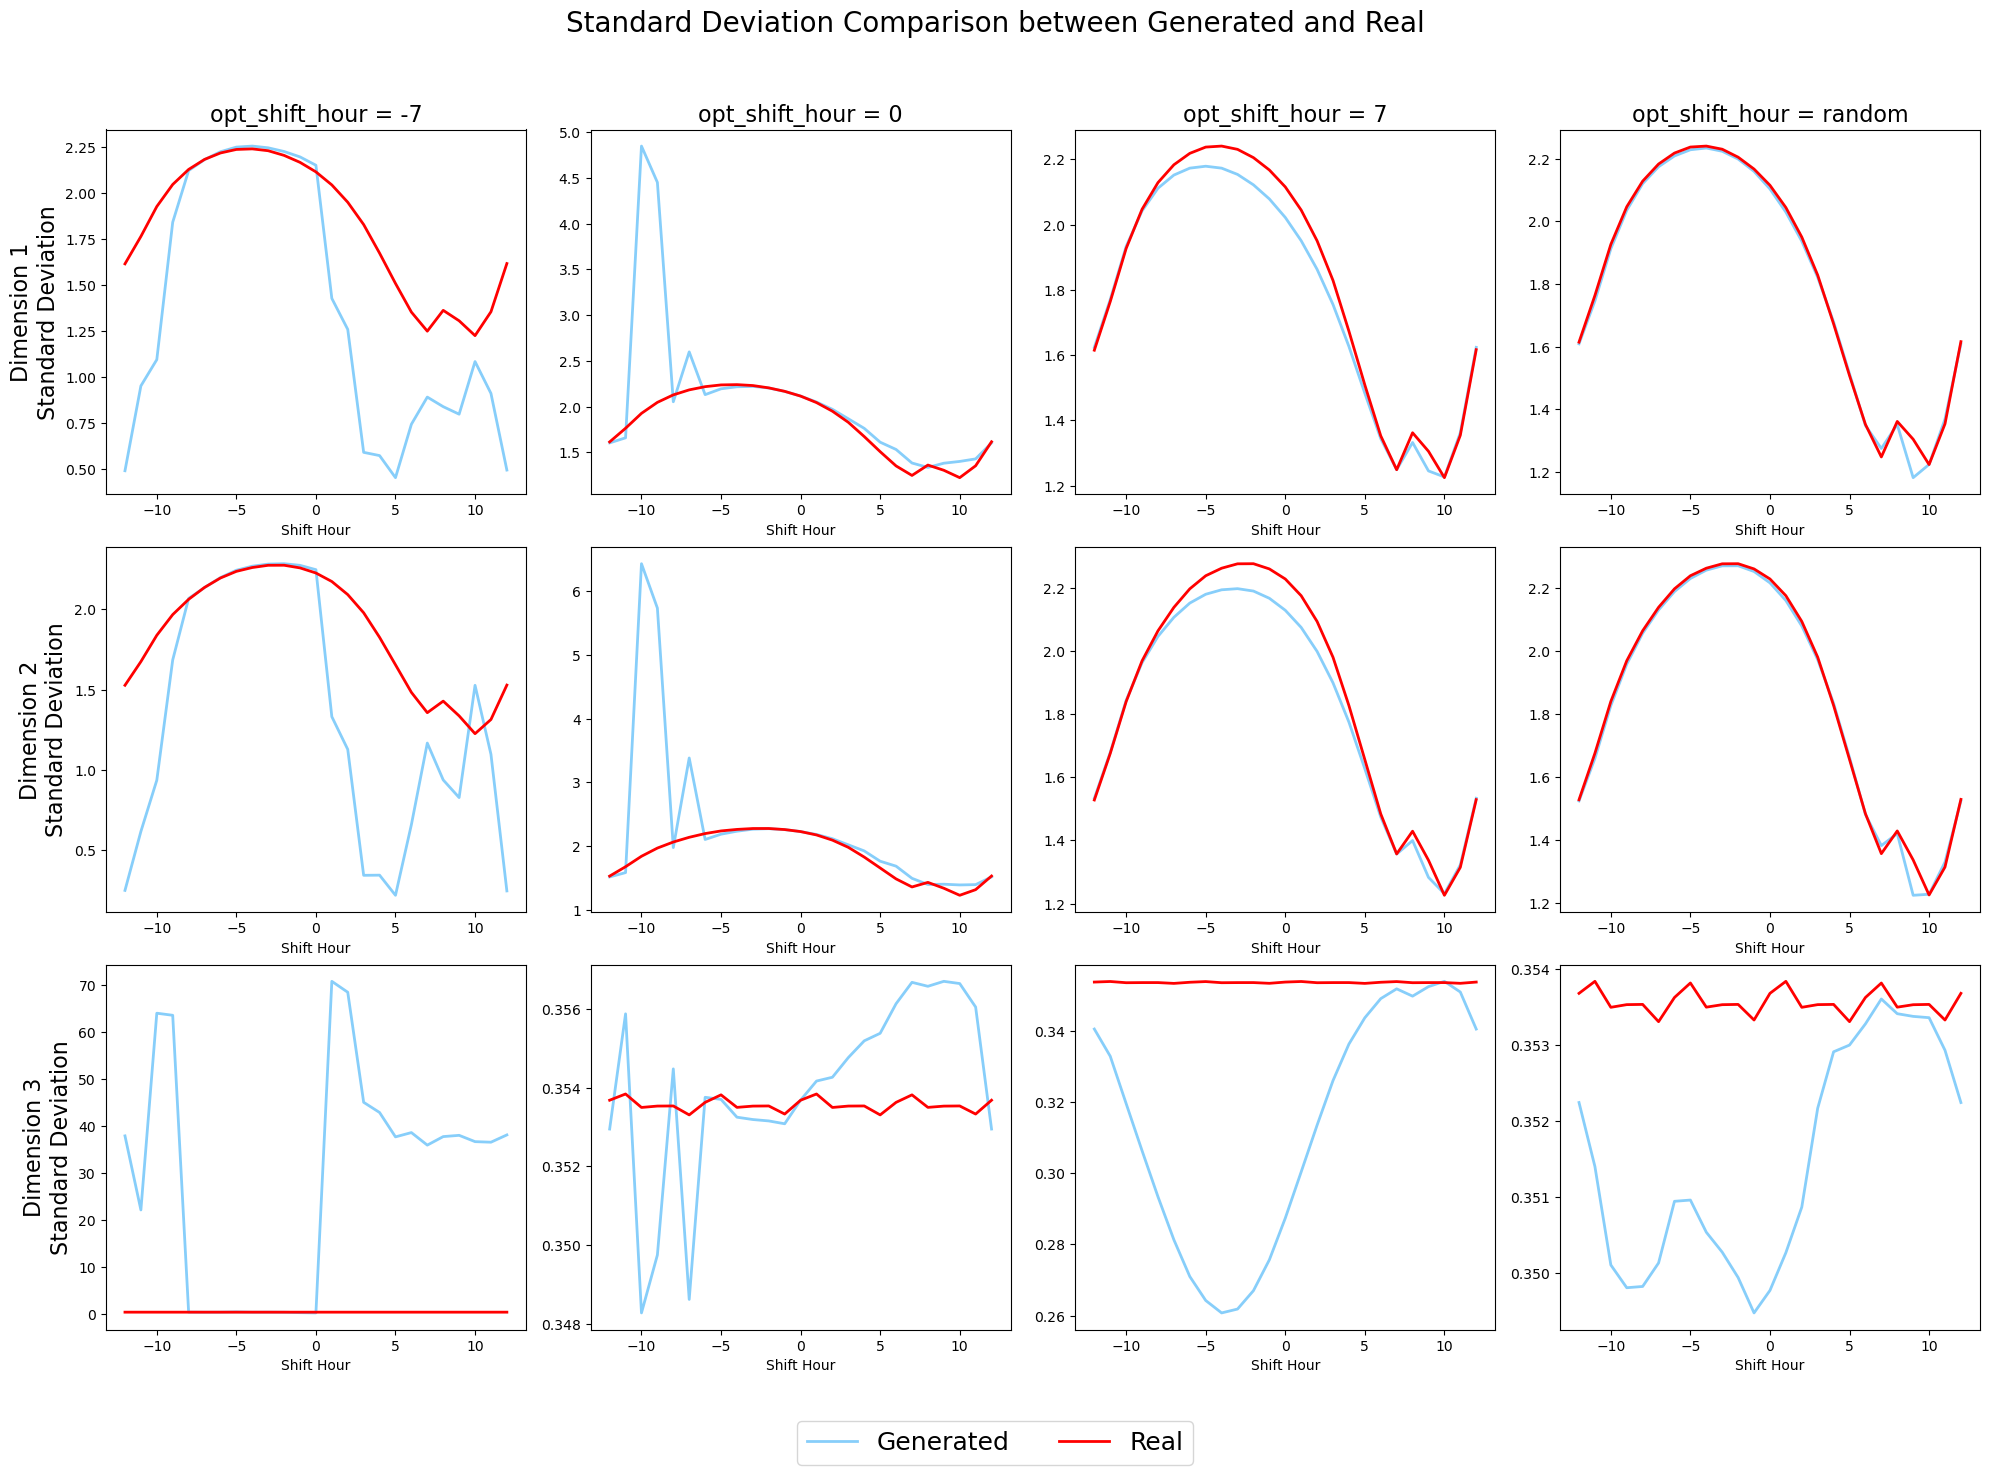

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_data(opt_shift_hour, type='val'):
    dir_name = f"stddev/stddev_{type}_{opt_shift_hour}"
    os.makedirs(dir_name, exist_ok=True)

    std_dev_results = []  # 標準偏差の結果を格納するためのリスト

    for shift_hour in shift_hours:
        file_path = f'opt_{opt_shift_hour}_VDP_{type}/VDP_{shift_hour}.csv'
        data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])
        std_dev_per_column = data_df.std()

        std_dev_results.append({
            'shift_hour': shift_hour,
            'StdDev_Column1': std_dev_per_column['Column1'],
            'StdDev_Column2': std_dev_per_column['Column2'],
            'StdDev_Column3': std_dev_per_column['Column3']
        })

    return pd.DataFrame(std_dev_results)

def plot_std_dev(opt_shift_hours, shift_hours, save_pdf=False, pdf_file_name='std_dev_comparison.pdf'):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    fig.suptitle('Standard Deviation Comparison between Generated and Real', fontsize=20)

    for i, opt_shift_hour in enumerate(opt_shift_hours):
        # 各列の最上部にタイトルを設定
        axes[0, i].set_title(f'opt_shift_hour = {opt_shift_hour}', fontsize=16)

        for j in range(1, 4):
            ax = axes[j-1, i]
            gen_data = process_data(opt_shift_hour, 'gen')
            val_data = process_data(opt_shift_hour, 'val')
            
            ax.plot(shift_hours, gen_data[f'StdDev_Column{j}'], label='Generated', color='#87CEFA', linewidth = 2)  # 水色っぽい青
            ax.plot(shift_hours, val_data[f'StdDev_Column{j}'], label='Real', color='r', linewidth = 2)
            if i == 0:  # 左端のサブプロットにのみy軸ラベルを追加
                ax.set_ylabel(f'Dimension {j}\nStandard Deviation', fontsize=16)
                #ax.set_ylim(1, 2.5)  # Y軸の範囲を0から3に設定
                #ax.set_ylim(1, 2.5)  # Y軸の範囲を0から3に設定


            ax.set_xlabel('Shift Hour')

    # 全体の図に対して共通の凡例を追加
    lines, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(lines, labels, loc='lower center', ncol=2, fontsize = 18)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.1)

    if save_pdf:
        plt.savefig(pdf_file_name, format='pdf')
        print(f"Plot saved as '{pdf_file_name}'.")
    else:
        plt.show()

# shift_hours と opt_shift_hours の定義
shift_hours = list(range(-12, 13))
opt_shift_hours = [-7, 0, 7, 'random']

# データの処理と描画、PDFに保存
plot_std_dev(opt_shift_hours, shift_hours, save_pdf=True, pdf_file_name='stddev/stddev_plot/std_dev_comparison.pdf')

Plot saved as 'stddev/stddev_plot/std_dev_comparison_2.pdf'.


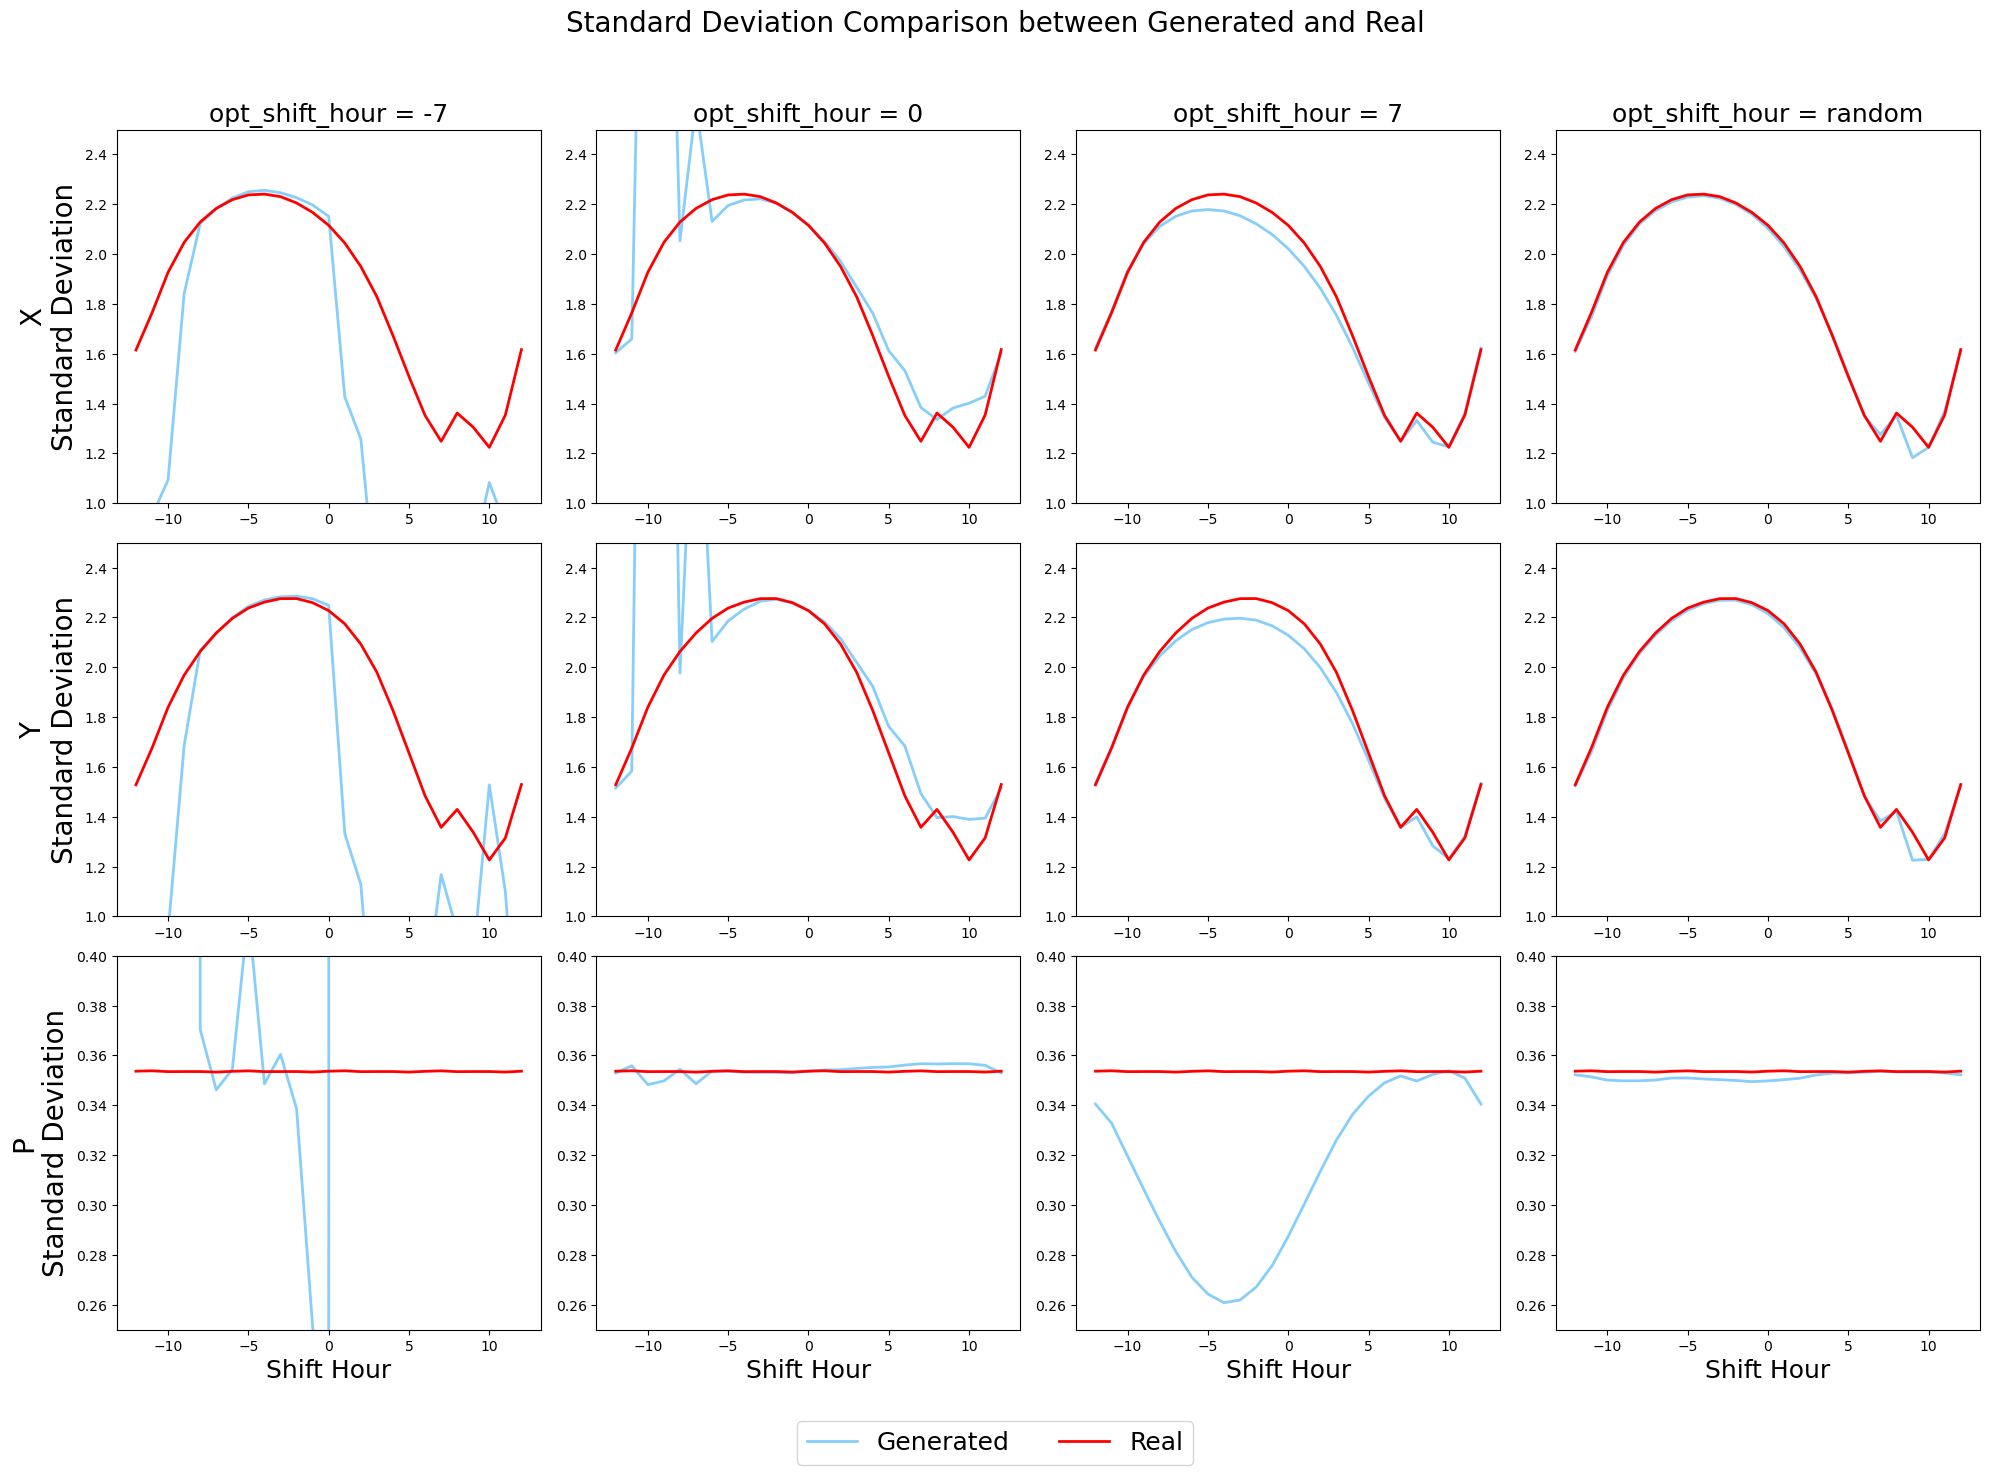

In [20]:
def plot_std_dev(opt_shift_hours, shift_hours, save_pdf=False, pdf_file_name='std_dev_comparison.pdf'):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    fig.suptitle('Standard Deviation Comparison between Generated and Real', fontsize=20)

    y_axis_limits = [(1, 2.5), (1, 2.5), (0.25, 0.4)]  # 各段のy軸の範囲を設定
    labels = ['X', 'Y', 'P']  # 新しいラベル名

    for i, opt_shift_hour in enumerate(opt_shift_hours):
        axes[0, i].set_title(f'opt_shift_hour = {opt_shift_hour}', fontsize=18)

        for j in range(1, 4):
            ax = axes[j-1, i]
            gen_data = process_data(opt_shift_hour, 'gen')
            val_data = process_data(opt_shift_hour, 'val')
            
            ax.plot(shift_hours, gen_data[f'StdDev_Column{j}'], label='Generated', color='#87CEFA', linewidth=2)  # 水色っぽい青
            ax.plot(shift_hours, val_data[f'StdDev_Column{j}'], label='Real', color='r', linewidth=2)
            
            ax.set_ylim(y_axis_limits[j-1])  # 指定された範囲にy軸の範囲を設定

            if i == 0:  # 左端のサブプロットにのみ新しいラベル名を追加
                ax.set_ylabel(f'{labels[j-1]}\nStandard Deviation', fontsize=20)
        ax.set_xlabel('Shift Hour', fontsize=18)

    lines, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(lines, labels, loc='lower center', ncol=2, fontsize=18)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.1)

    if save_pdf:
        plt.savefig(pdf_file_name, format='pdf')
        print(f"Plot saved as '{pdf_file_name}'.")
    else:
        plt.show()


# shift_hours と opt_shift_hours の定義
shift_hours = list(range(-12, 13))
opt_shift_hours = [-7, 0, 7, 'random']

# データの処理と描画、PDFに保存
plot_std_dev(opt_shift_hours, shift_hours, save_pdf=True, pdf_file_name='stddev/stddev_plot/std_dev_comparison_2.pdf')

Plot saved as 'stddev/stddev_plot/std_dev_comparison_partly.pdf'.


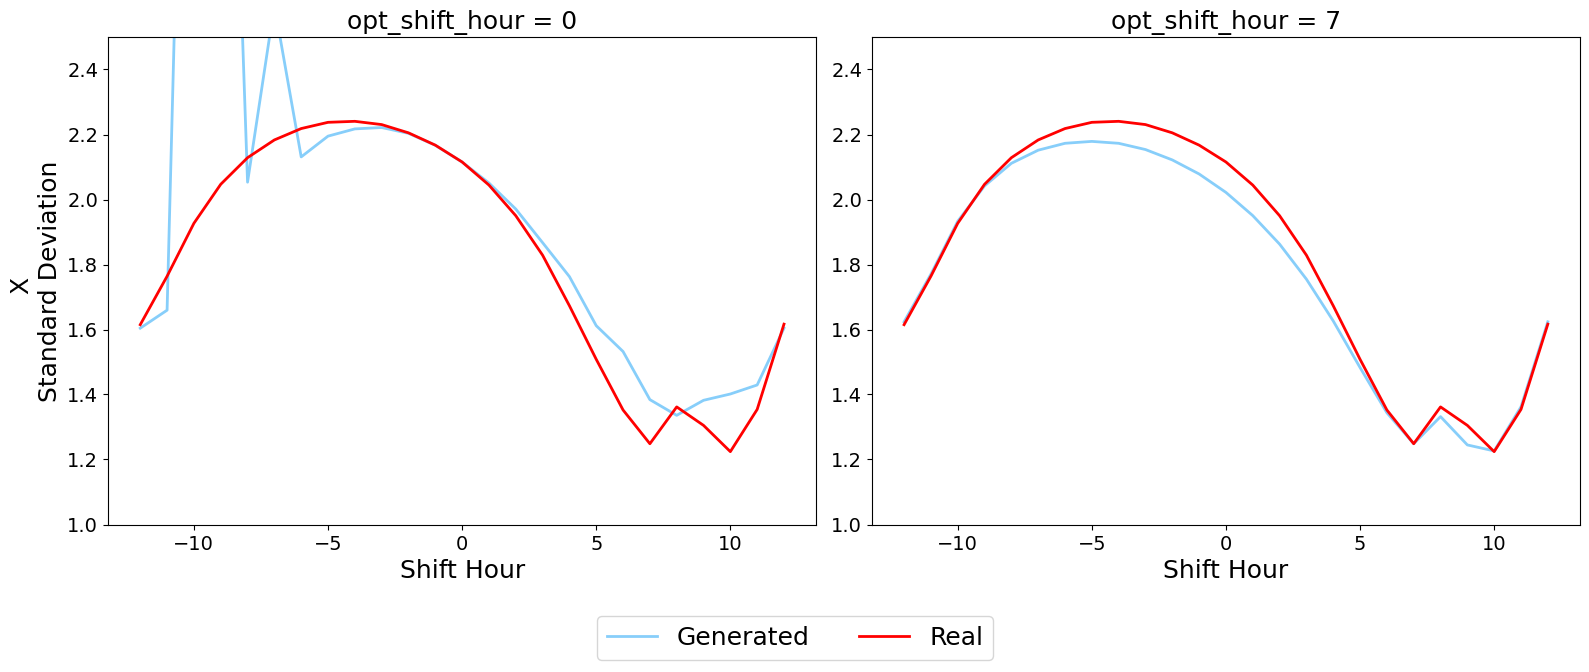

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_data(opt_shift_hour, type='val'):
    dir_name = f"stddev/stddev_{type}_{opt_shift_hour}"
    os.makedirs(dir_name, exist_ok=True)

    std_dev_results = []  # 標準偏差の結果を格納するためのリスト

    for shift_hour in shift_hours:
        file_path = f'opt_{opt_shift_hour}_VDP_{type}/VDP_{shift_hour}.csv'
        data_df = pd.read_csv(file_path, names=['Column1', 'Column2', 'Column3'])
        std_dev_per_column = data_df.std()

        std_dev_results.append({
            'shift_hour': shift_hour,
            'StdDev_Column1': std_dev_per_column['Column1'],
            'StdDev_Column2': std_dev_per_column['Column2'],
            'StdDev_Column3': std_dev_per_column['Column3']
        })

    return pd.DataFrame(std_dev_results)

def plot_std_dev(opt_shift_hours, shift_hours, save_pdf=False, pdf_file_name='std_dev_comparison.pdf'):
    fig, axes = plt.subplots(nrows=1, ncols=len(opt_shift_hours), figsize=(16, 7.5))  # nrowsを1に変更
    #fig.suptitle('Standard Deviation Comparison between Generated and Real', fontsize=20)

    for i, opt_shift_hour in enumerate(opt_shift_hours):
        ax = axes[i]  # 直接axes配列を使用
        ax.set_title(f'opt_shift_hour = {opt_shift_hour}', fontsize=18)

        gen_data = process_data(opt_shift_hour, 'gen')
        val_data = process_data(opt_shift_hour, 'val')
        
        # 予測データを水色でプロット
        ax.plot(shift_hours, gen_data['StdDev_Column1'], label='Generated', color='#87CEFA', linewidth = 2)  # 水色っぽい青
        # 実データを赤色でプロット
        ax.plot(shift_hours, val_data['StdDev_Column1'], label='Real', color='r', linewidth = 2)
        ax.set_ylim(1, 2.5)  # Y軸の範囲を0から3に設定

        # 目盛りの文字サイズを大きく設定
        ax.tick_params(axis='x', labelsize=14)  # X軸の目盛り
        ax.tick_params(axis='y', labelsize=14)  # Y軸の目盛り
        
        if i == 0:  # 左端のサブプロットにのみy軸ラベルを追加
            ax.set_ylabel('X \nStandard Deviation', fontsize=18)
        ax.set_xlabel('Shift Hour', fontsize = 18)

    # 全体の図に対して共通の凡例を追加
    lines, labels = axes[0].get_legend_handles_labels()
    fig.legend(lines, labels, loc='lower center', ncol=2, fontsize=18)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.2)  # 調整して余白を確保

    if save_pdf:
        plt.savefig(pdf_file_name, format='pdf')
        print(f"Plot saved as '{pdf_file_name}'.")
    else:
        plt.show()


# shift_hours と opt_shift_hours の定義
shift_hours = list(range(-12, 13))
opt_shift_hours = [0, 7]

# データの処理と描画、PDFに保存
plot_std_dev(opt_shift_hours, shift_hours, save_pdf=True, pdf_file_name='stddev/stddev_plot/std_dev_comparison_partly.pdf')